<a href="https://colab.research.google.com/github/laguz/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_1_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
cell_phones.head()

geo  time  cell_phones_total
0  abw  1960                0.0
1  abw  1965                0.0
2  abw  1970                0.0
3  abw  1975                0.0
4  abw  1976                0.0

Check for missing/null values in the three dataframes

In [ ]:
# Your Work Here

In [9]:
print(cell_phones.shape)
cell_phones.isnull().sum()

(9427, 3)


geo                  0
time                 0
cell_phones_total    0
dtype: int64

In [10]:
print(population.shape)
population.isnull().sum()

(59297, 3)


geo                 0
time                0
population_total    0
dtype: int64

In [14]:
print(geo_country_codes.shape)
print(geo_country_codes.isnull().sum())
geo_country_codes.head(273)

(273, 19)
geo                         0
g77_and_oecd_countries     14
income_3groups             55
income_groups              55
is--country                 0
iso3166_1_alpha2           27
iso3166_1_alpha3           26
iso3166_1_numeric          26
iso3166_2                 272
landlocked                 18
latitude                   32
longitude                  32
main_religion_2008         57
country                     0
un_state                    0
unicef_region              78
unicode_region_subtag      25
world_4region               2
world_6region              13
dtype: int64


geo g77_and_oecd_countries  ... world_4region             world_6region
0         abkh                 others  ...        europe       europe_central_asia
1          abw                 others  ...      americas                   america
2          afg                    g77  ...          asia                south_asia
3          ago                    g77  ...        africa        sub_saharan_africa
4          aia                 others  ...      americas                   america
..         ...                    ...  ...           ...                       ...
268  yem_south                 others  ...          asia  middle_east_north_africa
269        yug                 others  ...        europe       europe_central_asia
270        zaf                    g77  ...        africa        sub_saharan_africa
271        zmb                    g77  ...        africa        sub_saharan_africa
272        zwe                    g77  ...        africa        sub_saharan_africa

[273 rows x 19 columns]

In [101]:
pd.options.display.max_rows = 10

In [36]:
geo_country_codes['iso3166_2']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
268    NaN
269    NaN
270    NaN
271    NaN
272    NaN
Name: iso3166_2, Length: 273, dtype: object

Make a scatter plot from the `cell_phones` dataframe plotting "time" against "cell_phones_total"

In [ ]:
# Your Work Here

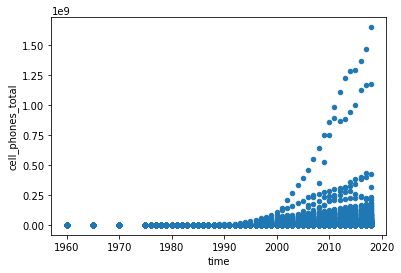

In [24]:
cell_phones.plot(x='time', y='cell_phones_total', kind='scatter');

### Part 2 - Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [31]:
# Your Work Here
cell_phones_population = pd.merge(cell_phones, population, on=['geo','time'])
cell_phones_population.shape

(8786, 4)

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [39]:
# Your Work Here
# Selecting the two colums
geo_select = geo_country_codes[['geo','country']]
# Check data
print(geo_country_codes.shape)
geo_select.shape

(273, 19)


(273, 2)

In [120]:
# Do the join
cell_phones_population_geo = pd.merge(cell_phones_population, geo_select, on='geo')
# Check the shape
cell_phones_population_geo.shape

(8786, 5)

### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [ ]:
# Your Work Here 

In [119]:
cell_phones_population_geo['numbers_cell_by_person'] = cell_phones_population_geo['cell_phones_total'] / cell_phones_population_geo['population_total']
# Do the check
cell_phones_population_geo.iloc[8319]

geo                                 usa
time                               2017
cell_phones_total                 4e+08
population_total              325084758
country                   United States
numbers_cell_by_person          1.23045
Name: 8319, dtype: object

### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [121]:
# Your Work Here
cell_phones_population_geo.describe(include='all')

geo         time  cell_phones_total  population_total  country
count   8786  8786.000000       8.786000e+03      8.786000e+03     8786
unique   195          NaN                NaN               NaN      195
top      lux          NaN                NaN               NaN  Senegal
freq      47          NaN                NaN               NaN       47
mean     NaN  1994.721603       9.701331e+06      3.002185e+07      NaN
...      ...          ...                ...               ...      ...
min      NaN  1960.000000       0.000000e+00      4.377000e+03      NaN
25%      NaN  1983.000000       0.000000e+00      1.474928e+06      NaN
50%      NaN  1995.000000       8.500000e+03      5.816554e+06      NaN
75%      NaN  2007.000000       2.028511e+06      1.823047e+07      NaN
max      NaN  2018.000000       1.649302e+09      1.427648e+09      NaN

[11 rows x 5 columns]

In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |


In [129]:
# Your Work Here
# Copy the DataFrame
most_cellphones = cell_phones_population_geo.copy()
# Filter by the year
most_cellphones_filtered = most_cellphones[(most_cellphones.time == 2017)]
# Sort by the numbers of cellphones
most_cellphones_filtered = most_cellphones_filtered.sort_values(by='cell_phones_total', ascending=False)
# Print the value
most_cellphones_filtered[['country','cell_phones_total']].head(5)

country  cell_phones_total
1530          China       1.469882e+09
3674          India       1.168902e+09
3627      Indonesia       4.351936e+08
8319  United States       4.000000e+08
6783         Russia       2.272997e+08

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

cable_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv'
online_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv'

cable = pd.read_csv(cable_news_url)
online = pd.read_csv(online_news_url)

merged = pd.merge(cable[['date', 'name', 'pct_of_all_candidate_clips']], online[['date', 'name', 'pct_of_all_candidate_stories']])
merged['date'] = pd.to_datetime(merged['date'], infer_datetime_format=True)
merged = merged.set_index('date')

unique_dates = list(set(merged.index.to_list()))

import datetime

joe_biden_cable_multiple = []
joe_biden_online_multiple = []

for date in unique_dates:
  that_day = merged.loc[datetime.date(year=date.year, month=date.month, day=date.day)]

  joe_biden_cable_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_clips']
  not_joe_biden_cable_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_clips'].max()
  joe_biden_cable_multiple_of_max = joe_biden_cable_that_day / not_joe_biden_cable_max

  joe_biden_online_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_stories']
  not_joe_biden_online_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_stories'].max()
  joe_biden_online_multiple_of_max = joe_biden_online_that_day / not_joe_biden_online_max


  joe_biden_cable_multiple.append(joe_biden_cable_multiple_of_max.values[0])
  joe_biden_online_multiple.append(joe_biden_online_multiple_of_max.values[0])

df = pd.DataFrame({'date': unique_dates, 'biden_cable_multiple':joe_biden_cable_multiple, 'biden_online_multiple': joe_biden_online_multiple})
df = df.set_index('date')
df = df.sort_index()

data_for_graph = df.loc[datetime.date(2019, 4, 15):]
print(data_for_graph.shape)
data_for_graph.head()

(27, 2)


biden_cable_multiple  biden_online_multiple
date                                                   
2019-04-21              3.087352               1.107492
2019-04-28              3.707641               1.295820
2019-05-05              2.805169               1.306122
2019-05-12              3.235849               1.045386
2019-05-19              2.494624               1.119588

### Part 1 — Recreate this explanatory visualization:



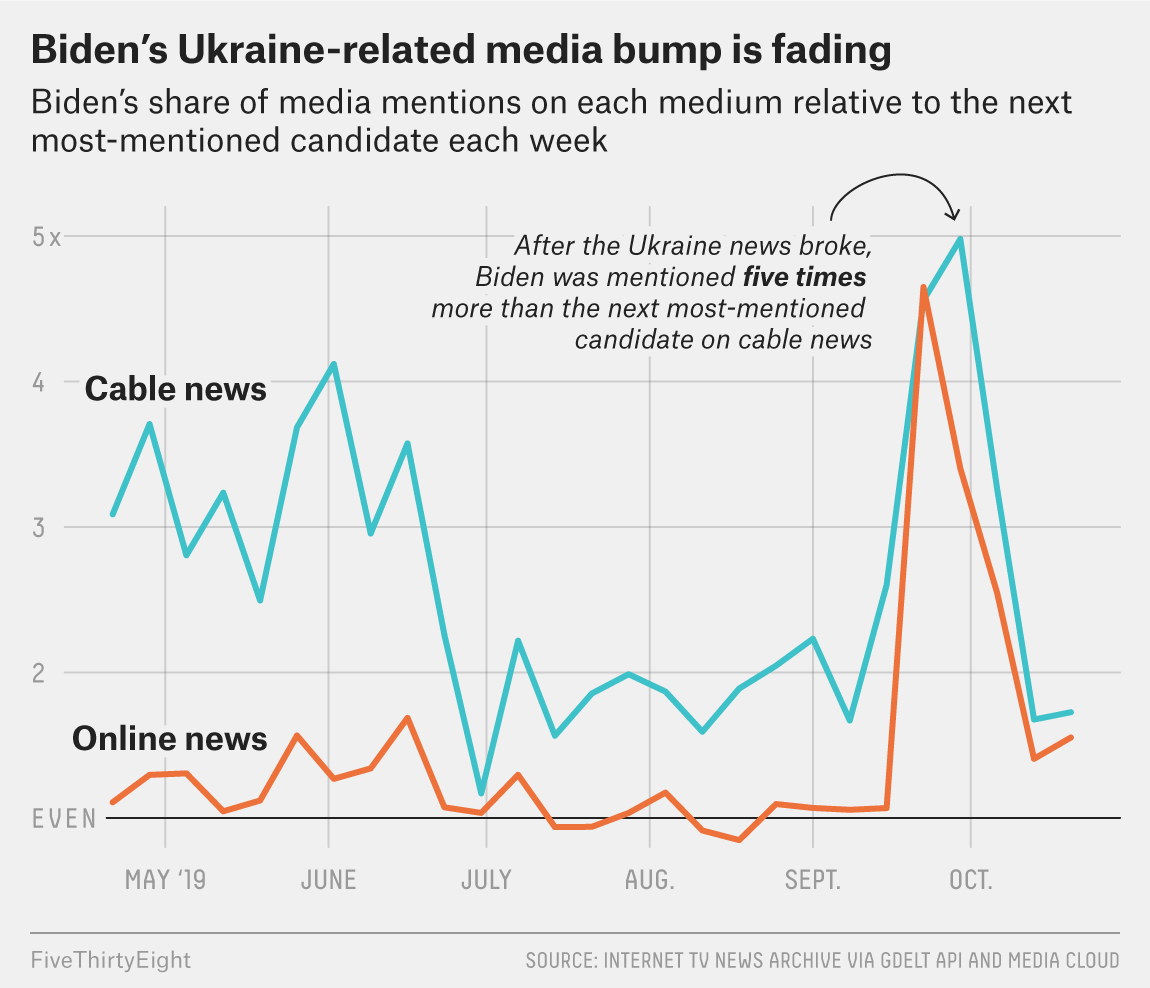

In [131]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.

**Expectations:** Your plot should include:
- 2 lines visualizing the Cable news vs Online news lines The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend **or** labels for the lines. (But **you don't need each label positioned next to its line or colored like 538.**)
- Title in the upper left: _"Biden's Ukraine-related media bump is fading"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Biden's share of media mentions on each medium relative ot the next most-mentioned candidate each week"_

In [ ]:
# Your Work Here

In [145]:
xlabels = ['MAY', 'JUNE', 'JULY', 'AUG.', 'SEPT.', 'OCT.']

Text(0.5, 1.0, "Biden's share of media mentions on each medium relative to the next most-mentioned candidate each week")

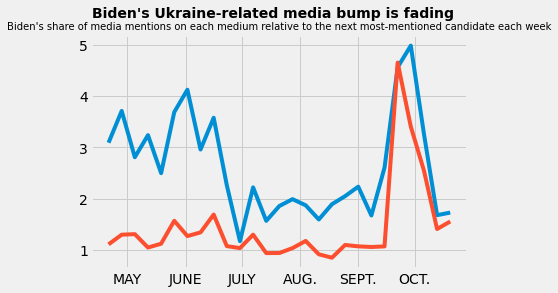

In [147]:
fig, ax = plt.subplots()

plt.figsize=(8,5)
plt.style.use('fivethirtyeight')
ax.set_xticklabels(xlabels)
plt.plot(data_for_graph);
plt.suptitle("Biden's Ukraine-related media bump is fading", fontsize=14, fontweight='bold')
plt.title("Biden's share of media mentions on each medium relative to the next most-mentioned candidate each week", fontsize=10)

## How to get a 3 on this Sprint Challenge:

Once you have completed the above making a solid attempt at each section, if you still have time remaining, you can go back and do any of the following to get a score of 3 on the above sections. Remember that everything in this section is **optional** and that we will average your scores between the different sections, so get the easy points first!

Complete any of the following **within** their corresponding sections in the Sprint Challenge (go back up and add these thigns):

### Data Wrangling Section 1

Filter the `cell_phones` dataframe to only include information about the USA and China and then remake the scatterplot. 

### Data Wrangling Section 2

Explain why we are using an "inner" join when we merge these dataframes. 

### Data Wrangling Section 3

Modify the geo column to make the geo codes uppercase instead of lowercase.

### Data Wrangling Section 4

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

### Data Storytelling 

Keep on working on your graph to make it look particularly like the 538 graph by manipulating the graph's background color, the line colors, the x and y axis tick marks/labels, etc. 

If you have already completed everything else, take this as far as you can within the time limit.


In [148]:
cell_phones.head()

geo  time  cell_phones_total
0  abw  1960                0.0
1  abw  1965                0.0
2  abw  1970                0.0
3  abw  1975                0.0
4  abw  1976                0.0

In [149]:
cell_phones_population_geo.head()

geo  time  cell_phones_total  population_total      country
0  afg  1960                0.0           8996967  Afghanistan
1  afg  1965                0.0           9956318  Afghanistan
2  afg  1970                0.0          11173654  Afghanistan
3  afg  1975                0.0          12689164  Afghanistan
4  afg  1976                0.0          12943093  Afghanistan

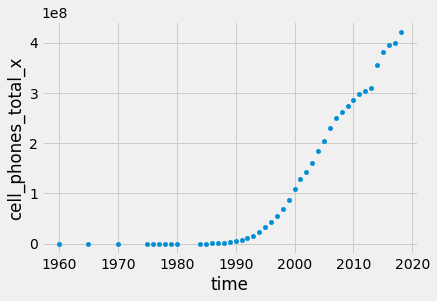

In [165]:
usa = cell_phones[(cell_phones.geo == 'usa')]
chn = cell_phones[(cell_phones.geo == 'chn')]
usa_chn = pd.merge(usa, chn, on='time')
#usa_chn
usa_chn.plot(x='time', y='cell_phones_total_x', kind='scatter');